In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
dset = pd.read_csv("C:/Users/luis-/Documents/data/data_modelo.csv", index_col='Fecha' ,parse_dates=True)
dset.head()

,tipologia,Pas,KmT,Gal
Fecha,,,,
2018-01-01,T1,49989133.0,302832.0,45722.802
2018-02-01,T1,57749305.0,288751.0,44962.978
2018-03-01,T1,55517990.0,284558.0,44419.352
2018-04-01,T1,58803415.0,293896.0,45797.674
2018-05-01,T1,59817232.0,301501.0,48300.563


In [3]:
dset.drop(dset.tail(3).index,inplace=True) # drop last n rows
dset

,tipologia,Pas,KmT,Gal
Fecha,,,,
2018-01-01,T1,49989133.0,302832.0,45722.802000
2018-02-01,T1,57749305.0,288751.0,44962.978000
2018-03-01,T1,55517990.0,284558.0,44419.352000
2018-04-01,T1,58803415.0,293896.0,45797.674000
2018-05-01,T1,59817232.0,301501.0,48300.563000
...,...,...,...,...
2020-04-01,T8,260744.0,444938.0,41604.035385
2020-05-01,T8,390165.0,692402.0,67079.802557
2020-06-01,T8,449279.0,713516.0,72585.138364


In [4]:
filter1=(dset["tipologia"] == "T1")
dt1= dset.loc[filter1]
filter2=(dset["tipologia"] =="T2")
dt2= dset.loc[filter2]
filter3=(dset["tipologia"] =="T3")
dt3= dset.loc[filter3]
filter4=(dset["tipologia"] =="T4")
dt4= dset.loc[filter4]
filter5=(dset["tipologia"] =="T5")
dt5= dset.loc[filter5]
filter6=(dset["tipologia"] =="T6")
dt6= dset.loc[filter6]
filter7=(dset["tipologia"] =="T7")
dt7= dset.loc[filter7]
filter8=(dset["tipologia"] =="T8")
dt8= dset.loc[filter8]

In [5]:
stepwise_fit1 = auto_arima(dt1['Gal'], trace=True,suppress_warnings=True)
stepwise_fit2 = auto_arima(dt2['Gal'], trace=True,suppress_warnings=True)
stepwise_fit3 = auto_arima(dt3['Gal'], trace=True,suppress_warnings=True)
stepwise_fit4 = auto_arima(dt4['Gal'], trace=True,suppress_warnings=True)
stepwise_fit5 = auto_arima(dt5['Gal'], trace=True,suppress_warnings=True)
stepwise_fit6 = auto_arima(dt6['Gal'], trace=True,suppress_warnings=True)
stepwise_fit7 = auto_arima(dt7['Gal'], trace=True,suppress_warnings=True)
stepwise_fit8 = auto_arima(dt8['Gal'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=608.086, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=609.314, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=609.377, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=606.242, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=611.529, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.702 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=697.226, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=701.671, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=691.796, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=696.343, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=837.273, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=692.851, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=693.339, Time=0.04 

In [6]:
#dummy = pd.get_dummies(dset['tipologia'])
#X_ = dset.drop(['tipologia'], axis = 1)
#X = pd.concat([dummy,X_], axis = 1)

C:\Users\luis-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\luis-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\luis-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\luis-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\luis-\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observati

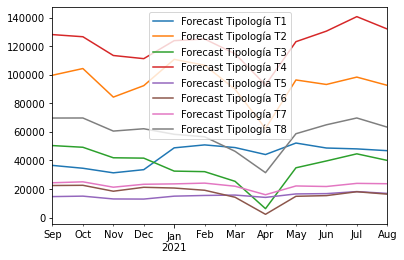

In [8]:
# Train the model on the full dataset 
model1 = model1 = SARIMAX(dt1['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result1 = model1.fit() 
  
# Forecast for the next 3 years 
forecast1 = result1.predict(start = len(dt1),  
                          end = (len(dt1)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T1') 
  
# Plot the forecast values 
#dt1['Gal'].plot(figsize = (12, 5), legend = True) 
forecast1.plot(legend = True) 


model2 = model2 = SARIMAX(dt2['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result2 = model2.fit() 
forecast2 = result2.predict(start = len(dt2),  
                          end = (len(dt2)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T2') 
  
#dt2['Gal'].plot(figsize = (12, 5), legend = True) 
forecast2.plot(legend = True) 

model3 = model3 = SARIMAX(dt3['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result3 = model3.fit() 
forecast3 = result3.predict(start = len(dt3),  
                          end = (len(dt3)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T3') 
  
#dt3['Gal'].plot(figsize = (12, 5), legend = True) 
forecast3.plot(legend = True) 

model4 = model4 = SARIMAX(dt4['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result4 = model4.fit() 
forecast4 = result4.predict(start = len(dt4),  
                          end = (len(dt4)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T4') 
  
#dt4['Gal'].plot(figsize = (12, 5), legend = True) 
forecast4.plot(legend = True) 

model5 = model5 = SARIMAX(dt5['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result5 = model5.fit() 
forecast5 = result5.predict(start = len(dt5),  
                          end = (len(dt5)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T5') 
  
#dt5['Gal'].plot(figsize = (12, 5), legend = True) 
forecast5.plot(legend = True) 

model6 = model6 = SARIMAX(dt6['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result6 = model6.fit() 
forecast6 = result6.predict(start = len(dt6),  
                          end = (len(dt6)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T6') 
  
#dt6['Gal'].plot(figsize = (12, 5), legend = True) 
forecast6.plot(legend = True) 

model7 = model7 = SARIMAX(dt7['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result7 = model7.fit() 
forecast7 = result7.predict(start = len(dt7),  
                          end = (len(dt7)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T7') 
  
#dt7['Gal'].plot(figsize = (12, 5), legend = True) 
forecast7.plot(legend = True) 

model8 = model8 = SARIMAX(dt8['Gal'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result8 = model8.fit() 
forecast8 = result8.predict(start = len(dt8),  
                          end = (len(dt8)-1) + 1 * 12,  
                          typ = 'levels').rename('Forecast Tipología T8') 
  
#dt8['Gal'].plot(figsize = (12, 5), legend = True) 
forecast8.plot(legend = True) 